In [362]:
%config IPCompleter.greedy=True

[0.73103819 0.8807753  0.95256007 0.0066963 ]


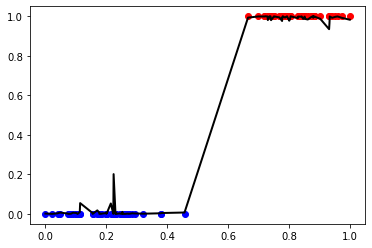

In [463]:
import numpy as np
from numpy.random import randn, uniform
from numpy import matmul
from math import log10
import matplotlib.pyplot as plt

def vector_sigmoid(vector):
    return np.array([1 / (1 + 2.718 ** -x) for x in vector])


def normalized(vector): 
    return (vector - min(vector)) / (max(vector) - min(vector))


def get_derivative(X, y, theta, theta_index):
    return (1 / m) * sum((vector_sigmoid(matmul(X, theta)) - y) * X[:, theta_index])


m = 100
X = np.array((np.ones(m), np.append(randn(m // 2), randn(m // 2) + uniform(6, 10))))
y = np.append(np.zeros(m // 2), np.ones(m // 2))

print(vector_sigmoid([1, 2, 3, -5]))

X[1:] = np.array([normalized(x) for x in X[1:]]) # normalize X
y = normalized(y)                                # normalize y

X = X.T # for easier computation

theta = np.full(len(X[0]), 0.5)
delta_theta = np.ones(theta.shape)
a = 10

i = 0
while abs(sum(delta_theta)) > 5 * 10 ** -3: # controls the needed decrease in cost to continue 
    for t in range(len(delta_theta)):
        delta_theta[t] = - a * get_derivative(X, y, theta, t)
    theta += delta_theta
    i += 1
#     print(i, theta, delta_theta)
#     plt.scatter(X[:, 1][:m // 2], y[:m // 2], color='b')
#     plt.scatter(X[:, 1][m // 2:], y[m // 2:], color='r')
#     plt.plot(sorted(X[:,1]), vector_sigmoid(matmul(X, theta)), color='black', linewidth='2')
#     plt.show()
#     plt.pause(0.001)
#     plt.clf()

plt.scatter(X[:, 1][: m // 2], y[:m // 2], color='b')
plt.scatter(X[:, 1][m // 2:], y[m // 2:], color='r')
plt.plot(sorted(X[:,1]), vector_sigmoid(matmul(X, theta)), color='black', linewidth='2')
plt.show()